Name: Tsai, Yu-Yun

In [35]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
#b(iii)
from sklearn.model_selection import train_test_split
#c(i)
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
#c(ii)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#d
from sklearn.neighbors import DistanceMetric
from scipy.spatial import distance


(a) Download the Vertebral Column Data Set from: https://archive.ics.uci. edu/ml/datasets/Vertebral+Column.

In [17]:
datacol = pd.read_csv('column_2C.dat', sep=" ", header=None)
datacol

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [18]:
datacol['classes']=datacol.loc[:,6].apply(lambda x: '1' if x == 'AB' else '0')
datacol = datacol.drop(datacol.columns[[6]], axis=1)
datacol

,0,1,2,3,4,5,classes
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


(b) Pre-Processing and Exploratory data analysis:
    
    i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

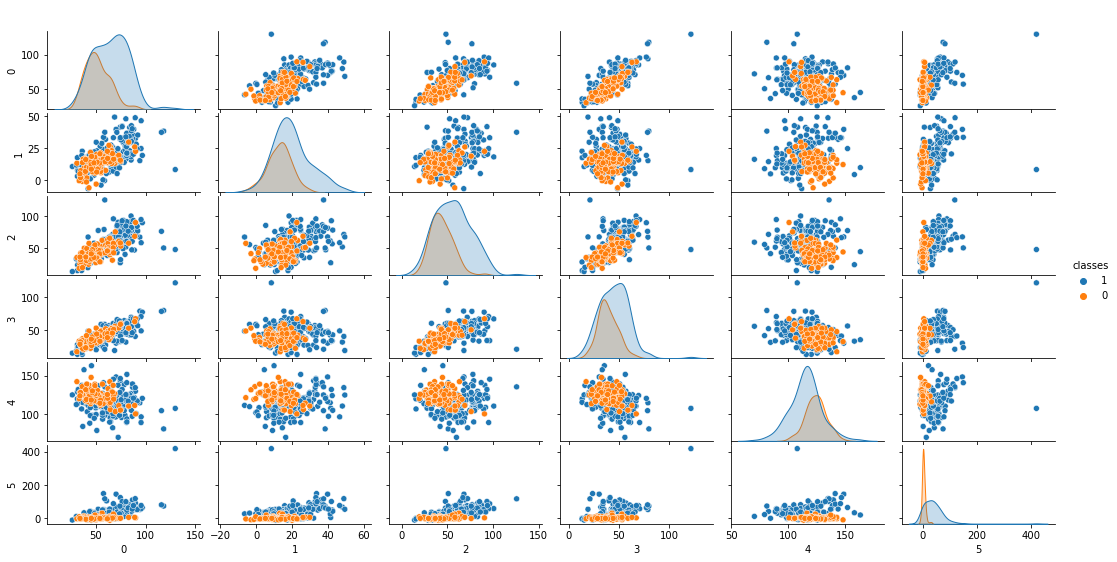

In [19]:
sns.pairplot(data = datacol, hue="classes")
plt.subplots_adjust(top=0.5)
plt.show()


ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

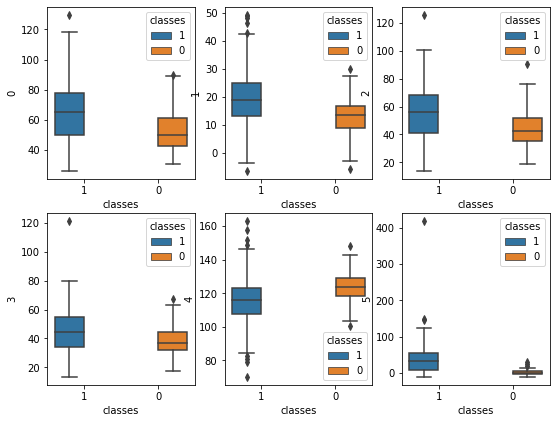

In [20]:
fig, ax = plt.subplots(2,3,figsize=(9,6))


sns.boxplot(data = datacol ,x='classes', y=datacol.iloc[:,0], hue='classes', ax=ax[0,0])
sns.boxplot(data = datacol ,x='classes', y=datacol.iloc[:,1], hue='classes', ax=ax[0,1])
sns.boxplot(data = datacol ,x='classes', y=datacol.iloc[:,2], hue='classes', ax=ax[0,2])
sns.boxplot(data = datacol ,x='classes', y=datacol.iloc[:,3], hue='classes', ax=ax[1,0])
sns.boxplot(data = datacol ,x='classes', y=datacol.iloc[:,4], hue='classes', ax=ax[1,1])
sns.boxplot(data = datacol ,x='classes', y=datacol.iloc[:,5], hue='classes', ax=ax[1,2])

fig.subplots_adjust(top=1.0)


iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the   data as the test set.


In [23]:

# split into train test sets
datacol_0 = datacol
datacol_0 = datacol_0.loc[datacol_0.classes=="0", ]

datacol_1 = datacol
datacol_1 = datacol_1.loc[datacol_1.classes=="1", ]

train = [datacol_0.iloc[:70],datacol_1.iloc[:140]]
train = pd.concat(train)

test = [datacol_0.iloc[70:],datacol_1.iloc[140:]]
test = pd.concat(test)

X_train = train.iloc[:,0:6]
y_train = train.iloc[:,6:7]

X_test = test.iloc[:,0:6]
y_test = test.iloc[:,6:7]

X_train

,0,1,2,3,4,5
210,38.51,16.96,35.11,21.54,127.63,7.99
211,54.92,18.97,51.60,35.95,125.85,2.00
212,44.36,8.95,46.90,35.42,129.22,4.99
213,48.32,17.45,48.00,30.87,128.98,-0.91
214,45.70,10.66,42.58,35.04,130.18,-3.39
...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09
136,88.02,39.84,81.77,48.18,116.60,56.77
137,83.40,34.31,78.42,49.09,110.47,49.67
138,72.05,24.70,79.87,47.35,107.17,56.43


(c) Classification using KNN on Vertebral Column Data Set
    i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


#k=5, euclidean_distance for p = 2
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
classifier.fit(X_train, y_train.values.ravel())
#test error
y_pred = classifier.predict(X_test)
error_test_c = (1-accuracy_score(y_test, y_pred))
#train error
y_pred_trainc = classifier.predict(X_train)
error_train_c = (1-accuracy_score(y_train, y_pred_trainc))
print(y_pred)
print('test error rate of (c): \n',error_test_c)
print('train error rate of (c): \n',error_train_c)

['1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1'
 '0' '1' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
test error rate of (c): 
 0.09999999999999998
train error rate of (c): 
 0.14761904761904765


In [106]:
train.iloc[:,6]

210    0
211    0
212    0
213    0
214    0
      ..
135    1
136    1
137    1
138    1
139    1
Name: classes, Length: 210, dtype: object

In [119]:
#euclidean_distances([a],[b])

dist=[]
classes=[]
i_list=[]

for i in range(len(train)):
    
     dist.append(euclidean_distances([train.iloc[0,:6]], [train.iloc[i,:6]]))
     classes.append(train.iloc[i,6])
     i_list.append(i)

In [133]:
df_dist = pd.DataFrame()
df_dist = df_dist.assign(i=i_list, Distance=dist, Classes=classes)

In [134]:
df_dist

,i,Distance,Classes
0,0,[[0.0]],0
1,1,[[28.141515595290986]],0
2,2,[[21.013548010747947]],0
3,3,[[20.753546684843915]],0
4,4,[[21.57414888240103]],0
...,...,...,...
205,205,[[99.40967960918088]],1
206,206,[[91.44795787769127]],1
207,207,[[83.56184057331436]],1
208,208,[[81.36029805746786]],1


In [135]:
df_dist.sort_values(by=['Distance'])

,i,Distance,Classes
0,0,[[0.0]],0
103,103,[[9.602999531396803]],1
88,88,[[10.30034950863302]],1
61,61,[[11.505024989108222]],0
59,59,[[11.556928657736064]],0
...,...,...,...
131,131,[[116.17306486445123]],1
146,146,[[124.20358408677258]],1
165,165,[[144.52215020542698]],1
145,145,[[148.35459379473224]],1


ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2
(Precision:how many of the correctly predicted cases actually turned out to be positive.)
(F1-score harmonic mean of Precision and Recall, where an F1 score reaches its best value at 1 and worst score at 0.)

In [18]:
# try k ∈ {208, 205, . . . , 7, 4, 1, } and record accuracy score

kcase = list(range(208, 0, -3))
error_test=[]
error_train_cii=[]
for i in kcase:
    classifier_k = KNeighborsClassifier(n_neighbors=i, p=2, metric='euclidean')
    classifier_k.fit(X_train, y_train.values.ravel())
    #test error
    y_pred_k = classifier_k.predict(X_test)
    error_test.append(1 - accuracy_score(y_test, y_pred_k))
    #train error
    y_pred_train = classifier_k.predict(X_train)
    error_train_cii.append(1-accuracy_score(y_train, y_pred_train))
    positionk=error_test.index(min(error_test))
    
print('test error rate : \n', error_test)
#location of the minimum test error rate: k=4 has min error rate
print('location of min error rate : \n', positionk+1)
#minimum test error rate when k=4
print('min test error rate k=4: \n', min(error_test))
#minimum train error rate
print('min train error rate : \n', min(error_train_cii))
print(kcase)

test error rate : 
 [0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.28, 0.27, 0.24, 0.22999999999999998, 0.19999999999999996, 0.21999999999999997, 0.15000000000000002, 0.19999999999999996, 0.16000000000000003, 0.16000000000000003, 0.14, 0.18000000000000005, 0.14, 0.16000000000000003, 0.15000000000000002, 0.16000000000000003, 0.17000000000000004, 0.16000000000000003, 0.14, 0.13, 0.12, 0.13, 0.12, 0.13, 0.12, 0.12, 0.12, 0.12, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.09999999999999998, 0.10999999999999999, 0.10999999999999

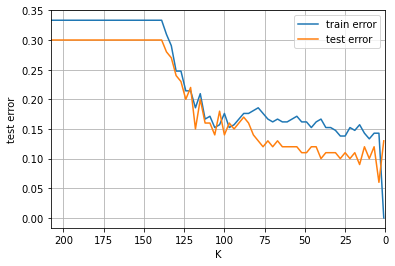

In [19]:
plt.plot(kcase, error_train_cii ,'-', label='train error')
plt.plot(kcase, error_test ,'-',label='test error')
plt.legend(loc="upper right")
plt.xlim(208,0)
plt.xlabel("K")
plt.ylabel("test error")
plt.grid()

In [20]:
#The best k is when k=4
classifier_k4 = KNeighborsClassifier(n_neighbors=4, p=2,metric='euclidean')
classifier_k4.fit(X_train, y_train.values.ravel())
#test error
y_pred_k4 = classifier_k4.predict(X_test)
error_k4 = (1 - accuracy_score(y_test, y_pred_k4))
#when k=4, fing f1 score
f1_score_k4 = f1_score(y_test, y_pred_k4,average='micro')
#when k=4, fing confusion matrix
confusion_k4 = confusion_matrix(y_test, y_pred_k4)
TP = 69/(1+69)
TN = 25/(25+5)
precision = 69/(5+69)

print('Confusion matrix : \n', confusion_k4)


#matrix = classification_report(y_test, y_pred_k4,labels=[1,0])
#print('Classification report : \n',matrix)

Confusion matrix : 
 [[25  5]
 [ 1 69]]


In [21]:
pd.DataFrame(confusion_k4)

,0,1
0,25,5
1,1,69


In [22]:
print('True Positive Rate: \n',TP)
print('True Negative Rate: \n',TN)
print('Precision : \n',precision)
print('F1-score(micro) : \n',f1_score_k4)

True Positive Rate: 
 0.9857142857142858
True Negative Rate: 
 0.8333333333333334
Precision : 
 0.9324324324324325
F1-score(micro) : 
 0.94


iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

In [23]:
sizeN = range(10,220,10)
error_n=[]
min_error = []
error_train_ciii=[]
minerror_train_ciii=[]

for N in sizeN:
    n0rows = round(N /3)
    n1rows = N - round(N /3)
    train_n = [train.iloc[0:n0rows],train.iloc[70:(70+n1rows)]]
    train_n = pd.concat(train_n)
    X_train_n = train_n.iloc[:,0:6]
    y_train_n = train_n.iloc[:,6:7]
    
    kcaseN = range(1, N, 5)
    error_n=[]
    
    for i in kcaseN:
        classifier_n = KNeighborsClassifier(n_neighbors=i, p=2,metric='euclidean')
        classifier_n.fit(X_train_n, y_train_n.values.ravel())
        #test error
        y_pred_n = classifier_n.predict(X_test)
        error_n.append(1 - accuracy_score(y_test, y_pred_n))
        #train error
        y_pred_trainciii = classifier_n.predict(X_train)
        error_train_ciii.append(1-accuracy_score(y_train, y_pred_trainciii))

    min_error.append(min(error_n))
    minerror_train_ciii.append(min(error_train_ciii))
print('min test error rate : \n',min_error)
print('min train error rate of (ciii): \n',minerror_train_ciii)        
    


min test error rate : 
 [0.25, 0.18999999999999995, 0.21999999999999997, 0.25, 0.30000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.25, 0.21999999999999997, 0.17000000000000004, 0.16000000000000003, 0.14, 0.13, 0.13, 0.12, 0.09999999999999998, 0.08999999999999997, 0.08999999999999997, 0.07999999999999996]
min train error rate of (ciii): 
 [0.28095238095238095, 0.23809523809523814, 0.2047619047619048, 0.2047619047619048, 0.2047619047619048, 0.2047619047619048, 0.2047619047619048, 0.2047619047619048, 0.2047619047619048, 0.16190476190476188, 0.09999999999999998, 0.06666666666666665, 0.06190476190476191, 0.042857142857142816, 0.033333333333333326, 0.00952380952380949, 0.00952380952380949, 0.004761904761904745, 0.004761904761904745, 0.0, 0.0]


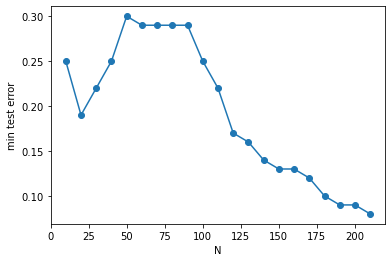

In [24]:
plt.plot(sizeN, min_error,'-o')
plt.xlabel("N")
plt.ylabel("min test error");

(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.
B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?
C. which becomes Chebyshev Distance with p → ∞ 

A. which becomes Manhattan Distance with p = 1.

In [25]:
#(A)
Kcase=list(range(1,197,5))
error_K=[]
error_train_da=[]
for K in Kcase:
    classifier_K = KNeighborsClassifier(n_neighbors=K, p=1, metric='manhattan')
    classifier_K.fit(X_train, y_train.values.ravel())
    #test error
    y_pred_K = classifier_K.predict(X_test)
    error_K.append(1 - accuracy_score(y_test, y_pred_K))
    positionK=error_K.index(min(error_K))
    #train error
    y_pred_trainda = classifier_K.predict(X_train)
    error_train_da.append(1-accuracy_score(y_train, y_pred_trainda))

print('test error rate : \n', error_K)
#location of the minimum test error rate
print('location of min test error rate k=6: \n', positionK+1)
#minimum test error rate when k=6
print('min test error rate k=6: \n', min(error_K))
#minimum train error rate
print('min train error rate : \n', min(error_train_da))
print(Kcase)


test error rate : 
 [0.12, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.10999999999999999, 0.12, 0.13, 0.13, 0.13, 0.14, 0.13, 0.15000000000000002, 0.15000000000000002, 0.14, 0.14, 0.16000000000000003, 0.15000000000000002, 0.19999999999999996, 0.19999999999999996, 0.21999999999999997, 0.20999999999999996, 0.22999999999999998, 0.20999999999999996, 0.21999999999999997, 0.24, 0.28, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
location of min test error rate k=6: 
 2
min test error rate k=6: 
 0.10999999999999999
min train error rate : 
 0.0
[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196]


B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?
#You are given the values of log10(p). 
#For example, when log10p = 0.1, the p parameter used in the function should be 10^0.1

In [26]:
#K=6 is the best K in d(iA)
log10p=np.arange(0.1, 1.1, 0.1)
pvalue = 10 ** log10p

error_k6=[]
error_train_db=[]

for p in pvalue:
    classifier_k6 = KNeighborsClassifier(n_neighbors=6, p=p)
    classifier_k6.fit(X_train, y_train.values.ravel())
    #test error
    y_pred_k6 = classifier_k6.predict(X_test)
    error_k6.append(1 - accuracy_score(y_test, y_pred_k6))
    positionk6=error_k6.index(min(error_k6))
    #train error
    y_pred_traindb = classifier_k6.predict(X_train)
    error_train_db.append(1-accuracy_score(y_train, y_pred_traindb))

print('test error rate : \n', error_k6)
#minimum test error rate: K=6
print('min test error rate K=6: \n', min(error_k6))
#minimum train error rate: K=6
print('min train error rate K=6: \n', min(error_train_db))
#location of the minimum test error rate
print('location of min test error rate => logp=0.6: \n', positionk6+1)
print('pvalue: \n', pvalue)

                                    


test error rate : 
 [0.08999999999999997, 0.08999999999999997, 0.07999999999999996, 0.07999999999999996, 0.07999999999999996, 0.06000000000000005, 0.06999999999999995, 0.07999999999999996, 0.08999999999999997, 0.08999999999999997]
min test error rate K=6: 
 0.06000000000000005
min train error rate K=6: 
 0.1333333333333333
location of min test error rate => logp=0.6: 
 6
pvalue: 
 [ 1.25892541  1.58489319  1.99526231  2.51188643  3.16227766  3.98107171
  5.01187234  6.30957344  7.94328235 10.        ]


C. which becomes Chebyshev Distance with p → ∞

In [27]:
Kcase=list(range(1,197,5))

error_cheby=[]
error_train_dc=[]

for K in Kcase:
    classifier_cheby = KNeighborsClassifier(n_neighbors=K, p=1, metric='chebyshev')
    classifier_cheby.fit(X_train, y_train.values.ravel())
    #test error
    y_pred_cheby = classifier_cheby.predict(X_test)
    error_cheby.append(1 - accuracy_score(y_test, y_pred_cheby))
    positioncheby=error_cheby.index(min(error_cheby))
    #train error
    y_pred_traindc = classifier_cheby.predict(X_train)
    error_train_dc.append(1-accuracy_score(y_train, y_pred_traindc))

print('test error rate : \n', error_cheby)
#location of the minimum test error rate when k=16
print('location of min test error rate : \n', positioncheby+1)
#minimum test error rate when k=16: chebyshev
print('min test error rate chebyshev when k=16: \n', min(error_cheby))
#minimum train error rate: chebyshev
print('min test error rate chebyshev when k=16: \n', min(error_train_dc))
print('kvalue: \n',Kcase)
                                 


test error rate : 
 [0.13, 0.09999999999999998, 0.12, 0.07999999999999996, 0.10999999999999999, 0.12, 0.12, 0.09999999999999998, 0.13, 0.12, 0.12, 0.12, 0.14, 0.13, 0.14, 0.10999999999999999, 0.14, 0.12, 0.15000000000000002, 0.14, 0.18999999999999995, 0.18000000000000005, 0.18000000000000005, 0.18000000000000005, 0.20999999999999996, 0.20999999999999996, 0.25, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
location of min test error rate : 
 4
min test error rate chebyshev when k=16: 
 0.07999999999999996
min test error rate chebyshev when k=16: 
 0.0
kvalue: 
 [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196]


 ii. Mahalanobis Distance.

In [28]:
Kcase=list(range(1,197,5))

error_mahalanobis=[]
error_train_dii=[]


for K in Kcase:
    classifier_mahalanobis = KNeighborsClassifier(n_neighbors=K, p=1, metric='mahalanobis',
                                                  metric_params={'VI':np.linalg.inv(np.cov(X_train,rowvar=False))})
    classifier_mahalanobis.fit(X_train, y_train.values.ravel())
    #test error
    y_pred_mahalanobis = classifier_mahalanobis.predict(X_test)
    error_mahalanobis.append(1 - accuracy_score(y_test, y_pred_mahalanobis))
    position_mahalanobis=error_mahalanobis.index(min(error_mahalanobis))
    #train error
    y_pred_traindii = classifier_mahalanobis.predict(X_train)
    error_train_dii.append(1-accuracy_score(y_train, y_pred_traindii))

    
print('test error rate : \n', error_mahalanobis)
#location of the minimum test error rate
print('location of min test error rate : \n', position_mahalanobis+1)
#minimum test error rate when k=1: mahalanobis
print('min test error rate mahalanobis when k=1: \n', min(error_mahalanobis))
#minimum train error rate when : mahalanobis
print('min train error rate mahalanobis when k=1: \n', min(error_train_dii))
print('kvalue: \n',Kcase)
                                 



test error rate : 
 [0.17000000000000004, 0.17000000000000004, 0.19999999999999996, 0.19999999999999996, 0.20999999999999996, 0.19999999999999996, 0.22999999999999998, 0.20999999999999996, 0.24, 0.24, 0.24, 0.26, 0.25, 0.27, 0.26, 0.25, 0.24, 0.26, 0.26, 0.26, 0.28, 0.28, 0.31000000000000005, 0.29000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
location of min test error rate : 
 1
min test error rate mahalanobis when k=1: 
 0.17000000000000004
min train error rate mahalanobis when k=1: 
 0.0
kvalue: 
 [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196]


e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [29]:
#Euclidean
Kcase=list(range(1,197,5))

error_euc=[]
error_train_ei=[]

for K in Kcase:
    classifier_euc = KNeighborsClassifier(n_neighbors=K, p=2, metric='euclidean',weights='distance')
    classifier_euc.fit(X_train, y_train.values.ravel())
    #test error
    y_pred_euc = classifier_euc.predict(X_test)
    error_euc.append(1 - accuracy_score(y_test, y_pred_euc))
    position_euc=error_euc.index(min(error_euc))
    #train error
    y_pred_traine = classifier_euc.predict(X_train)
    error_train_ei.append(1-accuracy_score(y_train, y_pred_traine))
    
print('test error rate : \n', error_euc)
#location of the minimum test error rate
print('location of min test error rate when k=6: \n', position_euc+1)
#minimum test error rate: Euclidean
print('min test error rate Euclidean when k=6: \n', min(error_euc))
#minimum train error rate: Euclidean
print('min train error rate Euclidean when k=6: \n', min( error_train_ei))
print('kvalue: \n',Kcase)
print( error_train_ei)                              

test error rate : 
 [0.13, 0.09999999999999998, 0.12, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.13, 0.13, 0.14, 0.14, 0.12, 0.14, 0.14, 0.13, 0.13, 0.13, 0.14, 0.14, 0.17000000000000004, 0.18999999999999995, 0.18999999999999995, 0.19999999999999996, 0.22999999999999998, 0.25, 0.27, 0.27, 0.27, 0.27, 0.28, 0.28]
location of min test error rate when k=6: 
 2
min test error rate Euclidean when k=6: 
 0.09999999999999998
min train error rate Euclidean when k=6: 
 0.0
kvalue: 
 [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [30]:
#Manhattan
Kcase=list(range(1,197,5))

error_manh=[]
error_train_eii=[]

for K in Kcase:
    classifier_manh = KNeighborsClassifier(n_neighbors=K, p=1, metric='manhattan', weights='distance')
    classifier_manh.fit(X_train, y_train.values.ravel())
    #test error
    y_pred_manh = classifier_manh.predict(X_test)
    error_manh.append(1 - accuracy_score(y_test, y_pred_manh))
    position_manh=error_manh.index(min(error_manh))
    #train error
    y_pred_traineii = classifier_manh.predict(X_train)
    error_train_eii.append(1-accuracy_score(y_train, y_pred_traineii))
    
    
print('test error rate : \n', error_manh)
#location of the minimum test error rate
print('location of min test error rate : \n', position_manh+1)
#minimum test error rate: Manhattan
print('min test error rate when k=26 Manhattan: \n', min(error_manh))
#minimum train error rate: Manhattan
print('min train error rate when k=26 Manhattan: \n', min(error_train_eii))
print('kvalue: \n',Kcase)
print(error_train_eii)

test error rate : 
 [0.12, 0.10999999999999999, 0.10999999999999999, 0.12, 0.10999999999999999, 0.09999999999999998, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.13, 0.13, 0.10999999999999999, 0.12, 0.14, 0.14, 0.13, 0.13, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.16000000000000003, 0.17000000000000004, 0.18000000000000005, 0.18999999999999995, 0.20999999999999996, 0.24, 0.25, 0.27, 0.27, 0.27, 0.27, 0.28, 0.29000000000000004]
location of min test error rate : 
 6
min test error rate when k=26 Manhattan: 
 0.09999999999999998
min train error rate when k=26 Manhattan: 
 0.0
kvalue: 
 [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [31]:
#Chebyshev
Kcase=list(range(1,197,5))

error_cheby=[]
error_train_eiii=[]

for K in Kcase:
    classifier_cheby = KNeighborsClassifier(n_neighbors=K, p=1, metric='chebyshev',weights='distance')
    classifier_cheby.fit(X_train, y_train.values.ravel())
    #test error
    y_pred_cheby = classifier_cheby.predict(X_test)
    error_cheby.append(1 - accuracy_score(y_test, y_pred_cheby))
    position_cheby=error_cheby.index(min(error_cheby))
    #train error
    y_pred_traineiii = classifier_cheby.predict(X_train)
    error_train_eiii.append(1-accuracy_score(y_train, y_pred_traineiii))
    
print('test error rate : \n', error_cheby)
#location of the minimum test error rate
print('location of min test error rate : \n', position_cheby+1)

#minimum test error rate: Chebyshev
print('min test error rate when k=16 Chebyshev: \n', min(error_cheby))
#minimum train error rate: Chebyshev
print('min train error rate when k=16 Chebyshev: \n', min(error_train_eiii))
print('kvalue: \n',Kcase)
print(error_train_eiii)

test error rate : 
 [0.13, 0.13, 0.12, 0.10999999999999999, 0.12, 0.12, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.12, 0.10999999999999999, 0.13, 0.12, 0.12, 0.12, 0.14, 0.13, 0.14, 0.14, 0.14, 0.14, 0.14, 0.15000000000000002, 0.14, 0.16000000000000003, 0.16000000000000003, 0.18000000000000005, 0.18999999999999995, 0.20999999999999996, 0.20999999999999996, 0.22999999999999998, 0.26, 0.26, 0.26, 0.27, 0.27, 0.27, 0.28]
location of min test error rate : 
 4
min test error rate when k=16 Chebyshev: 
 0.10999999999999999
min train error rate when k=16 Chebyshev: 
 0.0
kvalue: 
 [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [13]:
#Table of min test error of distance methods
data={'Min Test Error':[ '0.09999999999999998', ' 0.09999999999999998', '0.10999999999999999']}
pd.DataFrame(index=['Euclidean', 'Manhattan','Chebyshev'], data=data)

,Min Test Error
Euclidean,0.09999999999999998
Manhattan,0.09999999999999998
Chebyshev,0.10999999999999999


(f) What is the lowest training error rate you achieved in this homework?

According to all the code above, the lowest training error rate I achieved in this homework is "0", when k=1.